# **Delhivery Business Case**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The df team builds intelligence and capabilities using this df that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

### **Column Profiling:**
1. data - tells whether the data is testing or training data
2. trip_creation_time – Timestamp of trip creation
3. route_schedule_uuid – Unique ID for a particular route schedule
4. route_type – Transportation type
a. FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck
is making no other pickups or drop-offs along the way
b. Carting: Handling system consisting of small vehicles (carts)
5. trip_uuid - Unique ID given to a particular trip (A trip may include different source and
destination centers)
6. source_center - Source ID of trip origin
7. source_name - Source Name of trip origin
8. destination_cente – Destination ID
9. destination_name – Destination Name
10. od_start_time – Trip start time

11. od_end_time – Trip end time
12. start_scan_to_end_scan – Time taken to deliver from source to destination
13. is_cutoff – Unknown field
14. cutoff_factor – Unknown field
15. cutoff_timestamp – Unknown field
16. actual_distance_to_destination – Distance in kms between source and destination
warehouse
17. actual_time – Actual time taken to complete the delivery (Cumulative)
18. osrm_time – An open-source routing engine time calculator which computes the
shortest path between points in a given map (Includes usual traffic, distance through
major and minor roads) and gives the time (Cumulative)
19. osrm_distance – An open-source routing engine which computes the shortest path
between points in a given map (Includes usual traffic, distance through major and minor
roads) (Cumulative)
20. factor – Unknown field
21. segment_actual_time – This is a segment time. Time taken by the subset of the
package delivery
22. segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the
package delivery
23. segment_osrm_distance – This is the OSRM distance. Distance covered by subset of
the package delivery
24. segment_factor – Unknown field

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [38]:
df=pd.read_csv("delhivery_data.csv")
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [39]:
print('Number of records in the dataset: ',df.shape[0])
print('Number of features in the dataset: ',df.shape[1])

Number of records in the dataset:  144867
Number of features in the dataset:  24


#### **Dropping Unknown Fields**
- Dropping is_cutoff, cutoff_factor, cutoff_timestamp, factor, segment_factor

In [40]:
# df.drop(['is_cutoff',"route_schedule_uuid", 'cutoff_factor','cutoff_timestamp','factor','segment_factor'],axis=1)

### **Descriptive Statistics**

In [41]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [43]:
#check duplicates
df.duplicated().sum()

0

In [44]:
#checking null values
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

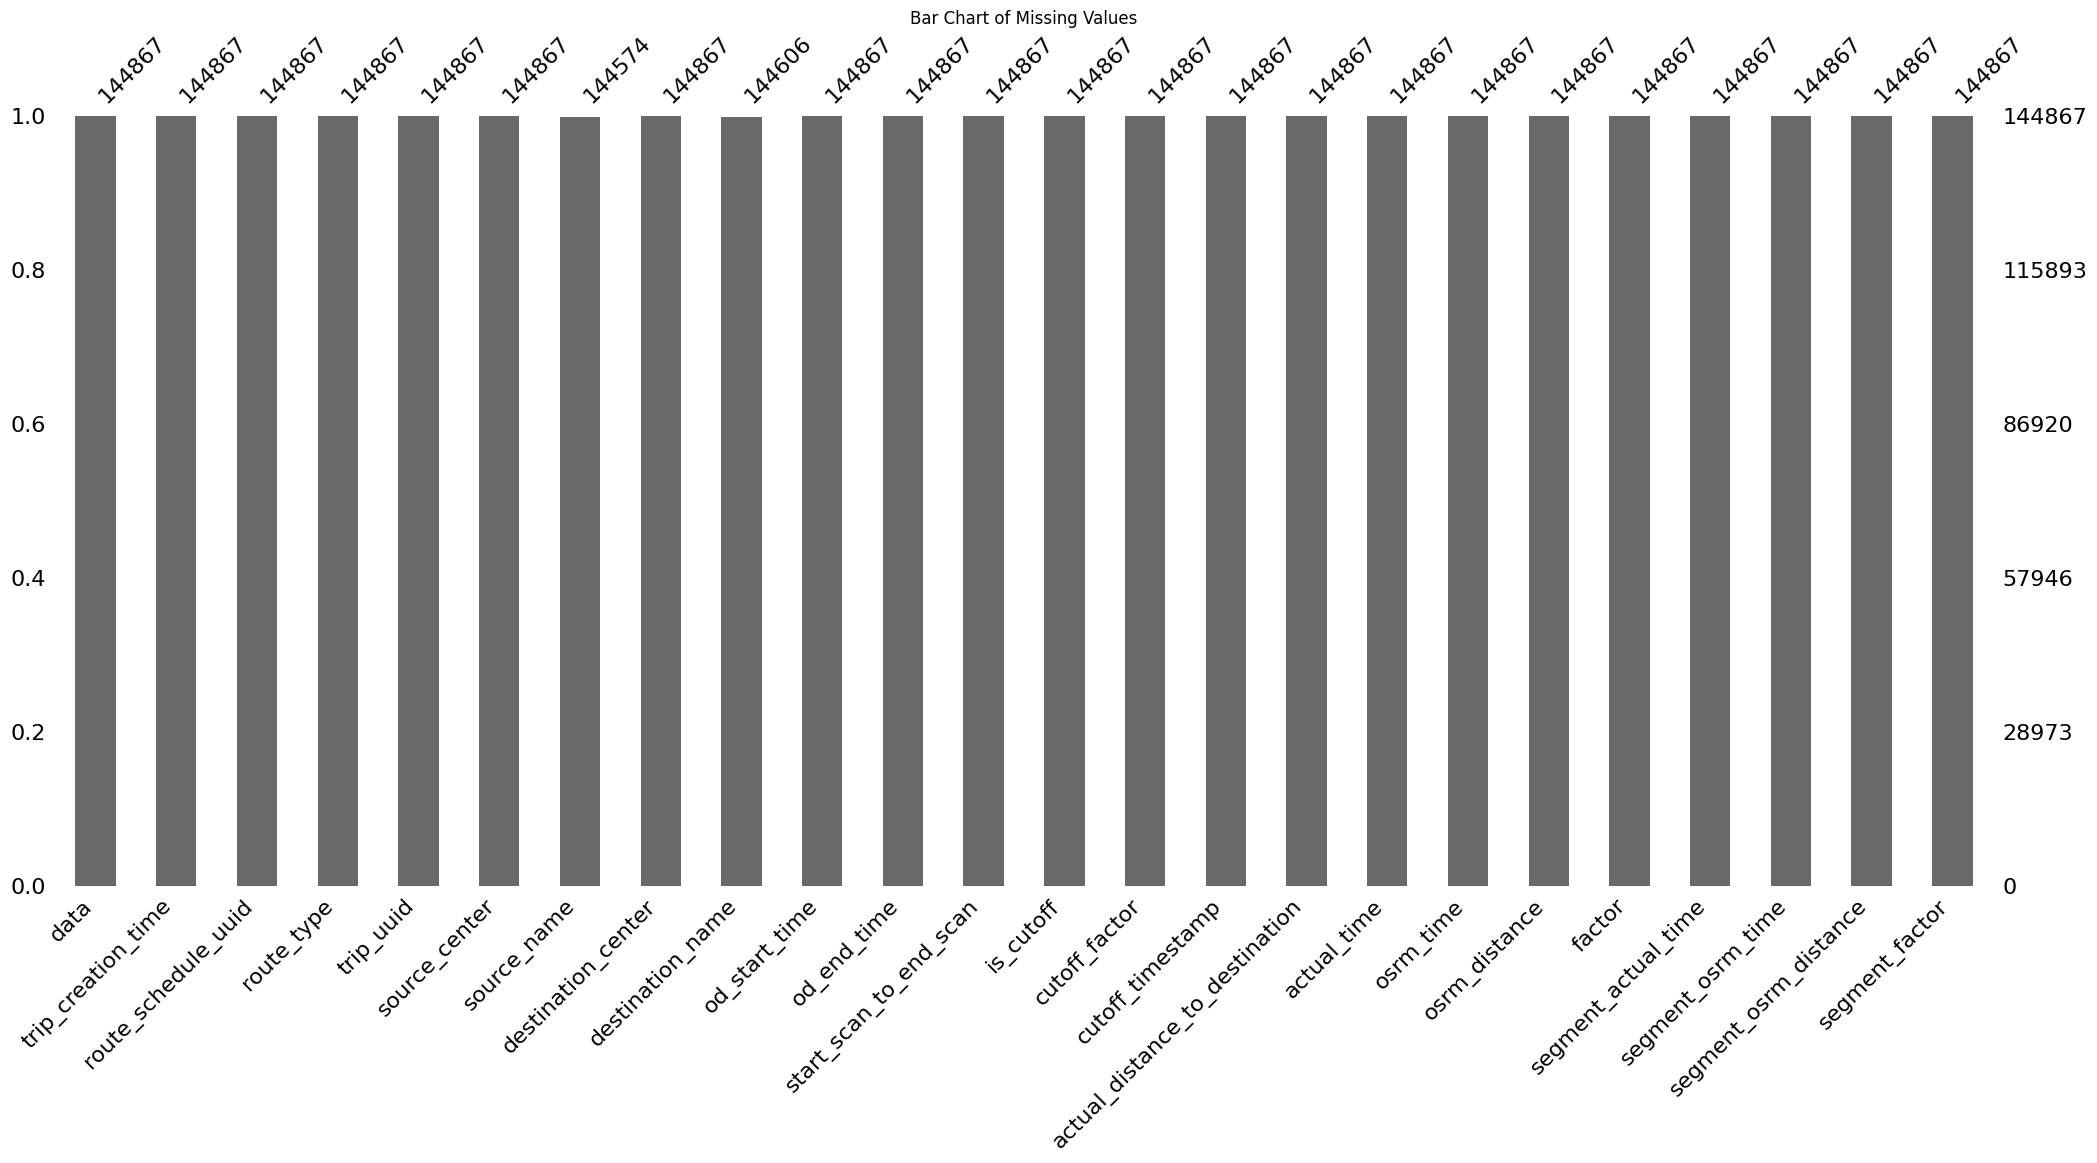

In [45]:
msno.bar(df)
plt.title('Bar Chart of Missing Values')
plt.show()

- There are 144574 non null values in source_name, 144606 non null values in destination_name
- There are 293 nulls in source_name and 261 in destination_name

In [46]:
df.dropna(inplace=True)

In [52]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

#### **Converting timestamps to datetime columns**
- trip_creation_time, od_start_time, cutoff_timestamp must be converted to datetime format

In [47]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'], format='%Y-%m-%d %H:%M:%S.%f')
df['od_start_time'] = pd.to_datetime(df['od_start_time'], format='%Y-%m-%d %H:%M:%S.%f')
df['od_end_time'] = pd.to_datetime(df['od_end_time'], format='%Y-%m-%d %H:%M:%S.%f')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

#### **Unique Values**

In [49]:
for i in df.columns:
    print(f"{i}: datatype is {df[i].dtype} and {df[i].nunique()} unique values ")
    print('The unique values are')
    print(df[i].unique())
    print('-'*90)

data: datatype is object and 2 unique values 
The unique values are
['training' 'test']
------------------------------------------------------------------------------------------
trip_creation_time: datatype is datetime64[ns] and 14787 unique values 
The unique values are
<DatetimeArray>
['2018-09-20 02:35:36.476840', '2018-09-23 06:42:06.021680',
 '2018-09-14 15:42:46.437249', '2018-09-13 20:44:19.424489',
 '2018-09-29 22:21:45.149226', '2018-09-17 21:26:00.454695',
 '2018-09-12 01:33:48.711350', '2018-10-01 16:00:45.719099',
 '2018-09-27 14:16:14.819357', '2018-09-13 16:41:41.992300',
 ...
 '2018-09-13 20:47:45.942988', '2018-10-01 19:56:20.111591',
 '2018-09-23 01:31:09.129173', '2018-10-01 18:17:37.047270',
 '2018-09-26 14:05:52.096792', '2018-09-26 19:50:29.657378',
 '2018-09-14 18:45:34.164734', '2018-09-22 11:30:41.399439',
 '2018-09-17 11:35:28.838714', '2018-09-20 16:24:28.436231']
Length: 14787, dtype: datetime64[ns]
-----------------------------------------------------------

In [50]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144316,144316,144316,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,2018-09-22 13:05:09.454117120,2018-09-22 17:32:42.435769344,2018-09-23 09:36:54.057172224,963.697698,233.561345,234.708498,417.996237,214.437055,285.549785,2.120178,36.175379,18.495697,22.818993,2.218707
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.000000,-23.444444
25%,2018-09-17 02:46:11.004421120,2018-09-17 07:37:35.014584832,2018-09-18 01:29:56.978912,161.000000,22.000000,23.352027,51.000000,27.000000,29.896250,1.604545,20.000000,11.000000,12.053975,1.347826
50%,2018-09-22 03:36:19.186585088,2018-09-22 07:35:23.038482944,2018-09-23 02:49:00.936600064,451.000000,66.000000,66.135322,132.000000,64.000000,78.624400,1.857143,28.000000,17.000000,23.508300,1.684211
75%,2018-09-27 17:53:19.027942912,2018-09-27 22:01:30.861209088,2018-09-28 12:13:41.675546112,1645.000000,286.000000,286.919294,516.000000,259.000000,346.305400,2.212280,40.000000,22.000000,27.813325,2.250000
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.403700,574.250000
std,NaN,NaN,NaN,1038.082976,345.245823,345.480571,598.940065,308.448543,421.717826,1.717065,53.524298,14.774008,17.866367,4.854804


In [51]:
df.describe(include='all')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144316,144316,144316,144316,144316,144316,144316,144316,144316,144316,...,144316,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
unique,2,NaN,1497,2,14787,1496,1496,1466,1466,NaN,...,92894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,training,NaN,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153837029526866991,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),NaN,...,2018-09-24 05:19:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,104632,NaN,1812,99132,101,23267,23267,15192,15192,NaN,...,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2018-09-22 13:05:09.454117120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-22 17:32:42.435769344,...,NaN,234.708498,417.996237,214.437055,285.549785,2.120178,36.175379,18.495697,22.818993,2.218707
min,NaN,2018-09-12 00:00:16.535741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-12 00:00:16.535741,...,NaN,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.000000,-23.444444
25%,NaN,2018-09-17 02:46:11.004421120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-17 07:37:35.014584832,...,NaN,23.352027,51.000000,27.000000,29.896250,1.604545,20.000000,11.000000,12.053975,1.347826
50%,NaN,2018-09-22 03:36:19.186585088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-22 07:35:23.038482944,...,NaN,66.135322,132.000000,64.000000,78.624400,1.857143,28.000000,17.000000,23.508300,1.684211
75%,NaN,2018-09-27 17:53:19.027942912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-27 22:01:30.861209088,...,NaN,286.919294,516.000000,259.000000,346.305400,2.212280,40.000000,22.000000,27.813325,2.250000
max,NaN,2018-10-03 23:59:42.701692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-06 04:27:23.392375,...,NaN,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.403700,574.250000


### **Merging rows** 

In [53]:
df['segment_key'] = df['trip_uuid'] + "_" + df['source_center'] + "_" + df['destination_center']
df['segment_key']

0         trip-153741093647649320_IND388121AAA_IND388620AAB
1         trip-153741093647649320_IND388121AAA_IND388620AAB
2         trip-153741093647649320_IND388121AAA_IND388620AAB
3         trip-153741093647649320_IND388121AAA_IND388620AAB
4         trip-153741093647649320_IND388121AAA_IND388620AAB
                                ...                        
144862    trip-153746066843555182_IND131028AAB_IND000000ACB
144863    trip-153746066843555182_IND131028AAB_IND000000ACB
144864    trip-153746066843555182_IND131028AAB_IND000000ACB
144865    trip-153746066843555182_IND131028AAB_IND000000ACB
144866    trip-153746066843555182_IND131028AAB_IND000000ACB
Name: segment_key, Length: 144316, dtype: object

In [54]:
df['segment_actual_time_sum']=df.groupby('segment_key')['segment_actual_time'].cumsum()
df['segment_osrm_distance_sum']=df.groupby('segment_key')['segment_osrm_distance'].cumsum()
df['segment_osrm_time_sum']=df.groupby('segment_key')['segment_osrm_time'].cumsum()

df[['segment_actual_time_sum','segment_osrm_distance_sum','segment_osrm_time_sum']]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144862,92.0,65.3487,94.0
144863,118.0,82.7212,115.0
144864,138.0,103.4265,149.0
144865,155.0,122.3150,176.0


In [ ]:
create_segment_dict={}